'''
Exploring publicly available data from LendingClub.com. They connect people who need money 
with people who have money. As an investor you would want to invest in people who show a high probabilty of
pay1ng you back. We will create a model that will help predict this.
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
data = pd.read_csv('loan_data.csv')

In [55]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [70]:
data['purpose'].nunique()
#Only 7 different variables in this column, perhaps later we can make each variable a dummy column.

7

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

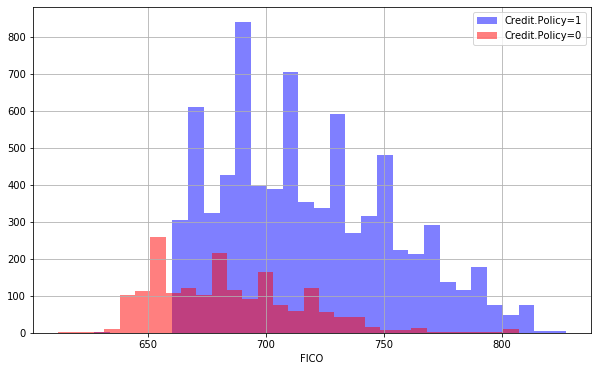

In [57]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [58]:

'''
The higher the fico the more chance the credit policy is one, and the customer meets 
the underwriting criteria. Also anyone under FICO score 660, will not meet the underwriting critera.
'''

Text(0.5, 0, 'FICO')

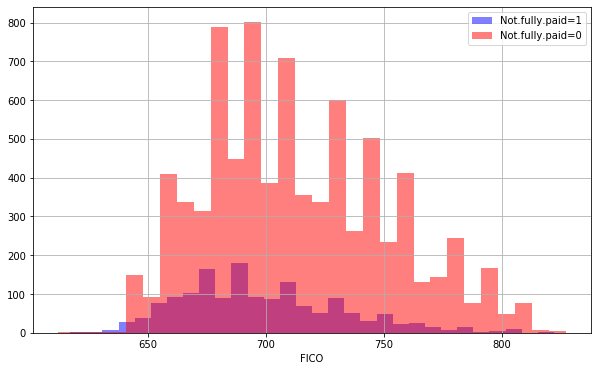

In [59]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Not.fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [ ]:
#We can see majority of people are fully paying off their loans

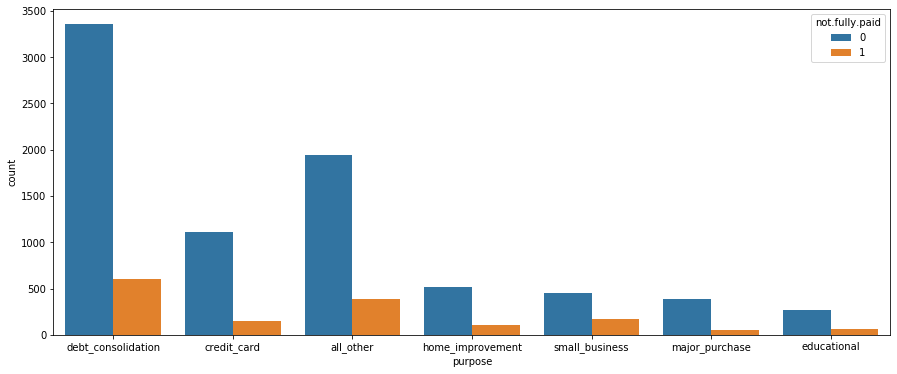

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(hue= 'not.fully.paid', data= data, x = 'purpose')

In [ ]:
#We see debt consolidation is the most popular reason for wanting a loan.

<Figure size 720x432 with 0 Axes>

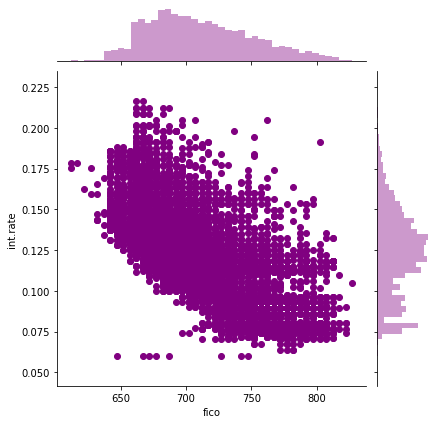

In [67]:
plt.figure(figsize=(10,6))
sns.jointplot(data = data, x='fico', y='int.rate', color= 'purple')

In [ ]:
#The higher the interest rate the lower the fico and vice versa.

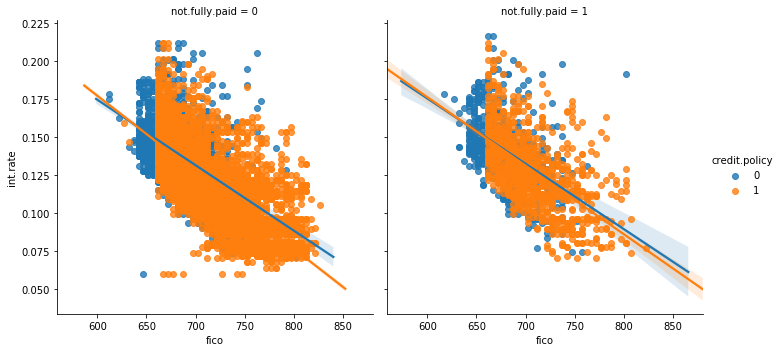

In [68]:
sns.lmplot(data=data, col= 'not.fully.paid', hue='credit.policy', x='fico', y='int.rate' )

In [ ]:
#We can notice again there is a cut off mark where fico is 660.

# Setting up the Data

In [81]:
cat_feats = ['purpose']

In [82]:
final_data = pd.get_dummies(data,columns=cat_feats,drop_first=True)

In [86]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [ ]:
#Train test Split

In [112]:
X= final_data.drop('not.fully.paid', axis=1)
y=final_data['not.fully.paid']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dtree = DecisionTreeClassifier()

In [117]:
#Predictions and Evaluation of Decision Tree

In [118]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
pred = dtree.predict(X_test)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1992  439]
 [ 344   99]]


In [122]:
#Training the Randomforest model

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc =RandomForestClassifier(n_estimators=300)

In [126]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rfc_pred = rfc.predict(X_test)

In [128]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



[[2423    8]
 [ 434    9]]


In [ ]:
'''
The model that did better depends on what metric you are trying to optimise for.
The decision tree did better when we look at the recall being 0.22 and f1-score 0.20
compare to the Randomforest being 0.02 and f1-score 0.04 for the not fully paid catagory. 
The recall is the ability for the classifer to find all the positive samples. 
Overall the random forest did better with an 85% accuracy
'''